# Ramen Image Classification

Adrianna Romanowski

252010

In the expansive world of ramen, we have various different kinds of broth: tonkotsu, miso, shio, shoyu, tsukemen. In this project, I will be using the Keras library to generate a multi-class image classification model.

Other ideas:
- model to help see what ingredients are in the bowl, volume of the bowl
- predicting the amount of calories in a bowl
- ordering help system, in order to recommend
- popularity of ramen in the future (time series)
- if you make image lower dimesnion, you can extract a bunch of features of the ramen

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random

### Data Exploration

I will be using a ramen dataset from the Department of Informatics at The University of Electro-Communication.

The dataset contains 555 pairs of original ramen images, as well as an additional 33 images I added of tsukemen. There are six image categories: tonkotsu (pork), shio (salt), soy sauce (shoyu), miso, spicy, and tsukemen.

Load the text file that has the labels as a pandas data frame

In [39]:
main_directory = "/Users/ada/Desktop/ramen/"

In [40]:
ramen_directory= "/Users/ada/Desktop/ramen/Ramen_images/"

In [41]:
soup_file = main_directory + "soup_labels.txt"
ramen_data = pd.read_csv(soup_file, delimiter="\t")

In [42]:
ramen_data.head()
#The categories are displayed as such

name  salt  soysauce  miso  porkbone  spicy  tsukemen
0  0001.png     0         0     1         0      0         0
1  0002.png     1         0     0         0      0         0
2  0003.png     0         0     0         1      0         0
3  0004.png     0         0     0         0      1         0
4  0005.png     0         0     0         0      1         0

In [43]:
ramen_types = ['salt', 'soysauce', 'miso', 'porkbone', 'spicy', 'tsukemen']

In [44]:
ramen_data_size = len(ramen_data)
print("The number of images is", ramen_data_size)

The number of images is 588


[457, 580, 333, 165, 445]


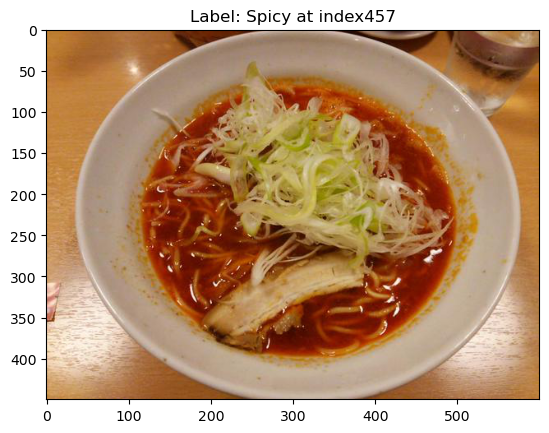

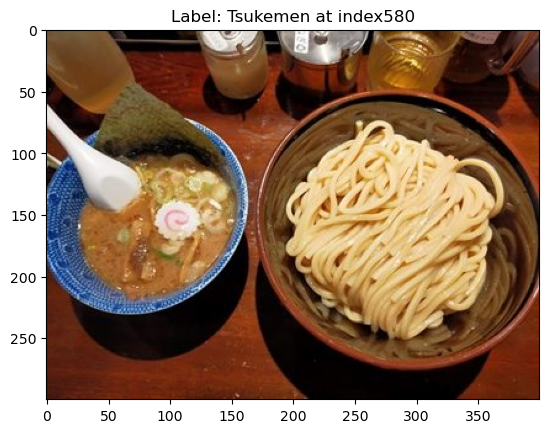

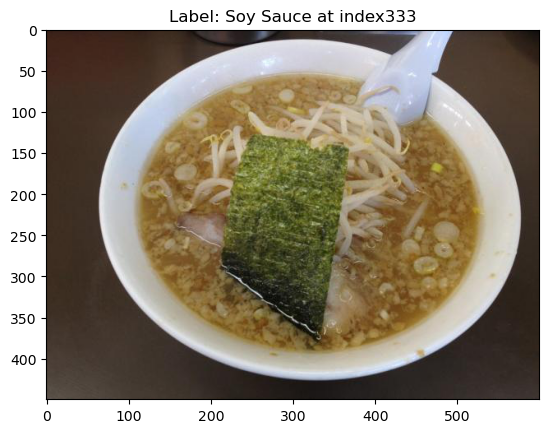

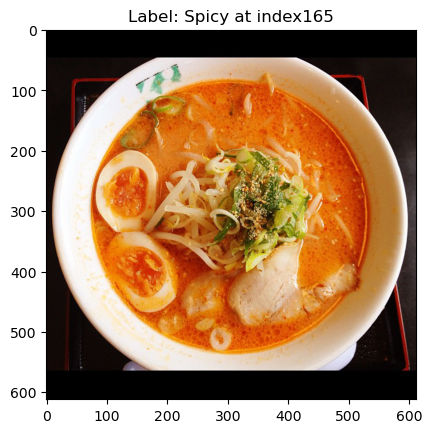

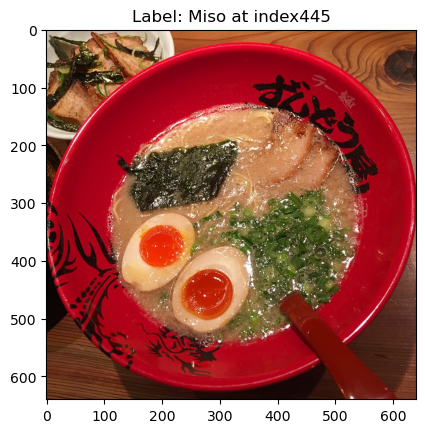

In [45]:
# Display 5 random images
i = 5
random_indices = random.sample(range(ramen_data_size), i)
print(random_indices)

for index in random_indices:
  row = ramen_data.iloc[index]
  image_name = row["name"]
  image_path = ramen_directory + image_name
  image = plt.imread(image_path)
  plt.imshow(image)

  # label based on the columns 'salt', 'soysauce', 'miso', 'porkbone', 'spicy', 'tsukemen'
  label = f"Label: "
  if row['salt'] == 1:
    label += "Salt "
  if row['soysauce'] == 1:
    label += "Soy Sauce "
  if row['miso'] == 1:
    label += "Miso "
  if row['porkbone'] == 1:
    label += "Pork Bone "
  if row['spicy'] == 1:
    label += "Spicy "
  if row['tsukemen'] == 1:
    label += "Tsukemen "

  plt.title(label + "at index" + str(index))
  plt.show()


In [46]:
#get the number of each kind of type
category_counts = []
for category in ramen_types:
  #filter data where cateogry is 1
  category_data = ramen_data[ramen_data[category]==1]
  print("There are", len(category_data), category,"ramen images")
  category_counts.append(len(category_data))

There are 67 salt ramen images
There are 106 soysauce ramen images
There are 137 miso ramen images
There are 148 porkbone ramen images
There are 97 spicy ramen images
There are 33 tsukemen ramen images


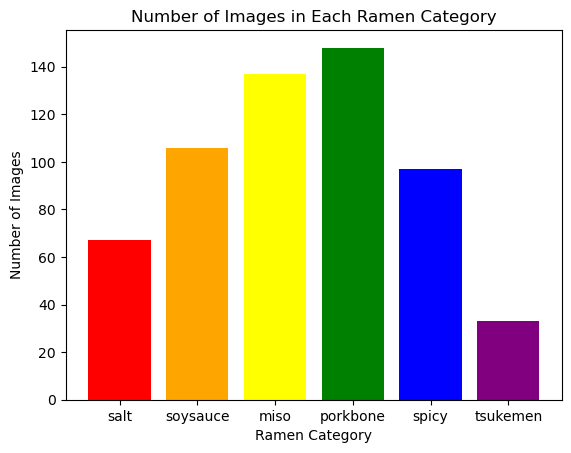

In [47]:
colors = ["red", "orange", "yellow", "green", "blue", "purple", "pink"]
plt.bar(ramen_types, category_counts, color = colors)
plt.title("Number of Images in Each Ramen Category")
plt.xlabel("Ramen Category")
plt.ylabel("Number of Images")
plt.show()

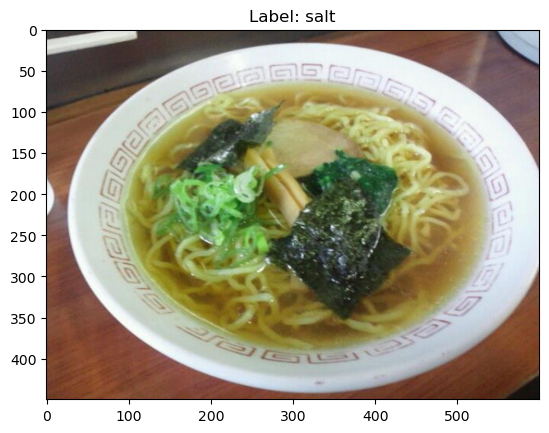

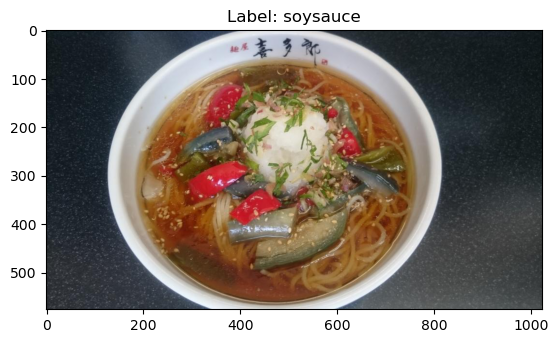

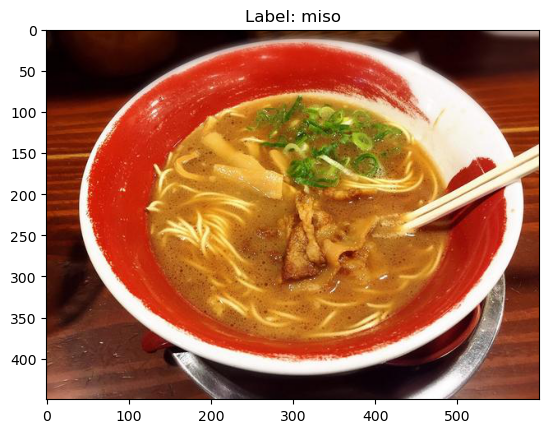

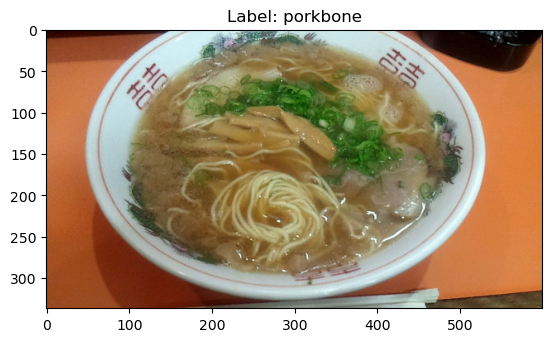

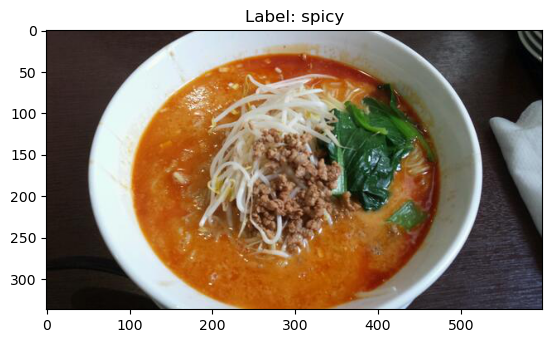

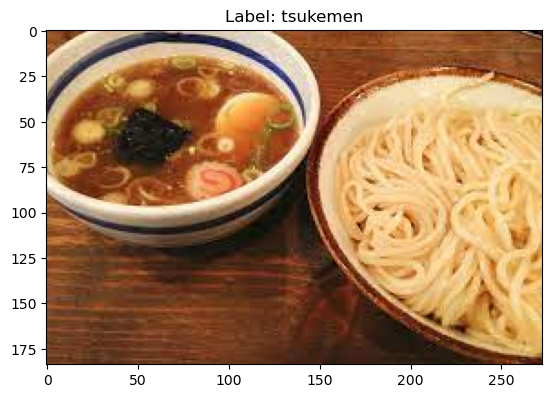

In [48]:
#visuzalize one image for each category
for category in ramen_types:
  #filter data where cateogry is 1
  category_data = ramen_data[ramen_data[category]==1]
  #select a random image
  random_index = random.randint(0, len(category_data)-1)
  chosen_image = category_data.iloc[random_index]

  #get the image
  image_name = chosen_image["name"]
  image_path = ramen_directory + image_name
  label = f"Label: {category}"
  image = plt.imread(image_path)
  plt.imshow(image)
  plt.title(label)
  plt.show()

After taking a look at some data, the images are all of varying sizes, therefore it is important to size all of them to the same dimensions. We mist make sure to normalize the images as well.

In [49]:
from keras import layers

In [50]:
#  target size (500x500) and rescale factor
rescale_factor = 1.0 / 255.0

In [51]:
resize_and_rescale = keras.Sequential([
  layers.Resizing(500, 500),
  layers.Rescaling(rescale_factor)
])

2023-11-09 19:36:53.641456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
image_files = [image for image in ramen_data["name"]]
normalized_directory = main_directory + "normalized/"

Here we will normalize the images by dividing the pizel values for 255. These normlaized and resized images will be saved in a new folder

In [53]:
for image_fil in image_files:
  image_path = ramen_directory + image_fil
  img = tf.keras.preprocessing.image.load_img(image_path)
  image_vec = tf.keras.preprocessing.image.img_to_array(img)
  processed_img = resize_and_rescale(image_vec)
  processed_img_path = normalized_directory + image_fil
  tf.keras.preprocessing.image.save_img(processed_img_path, processed_img)

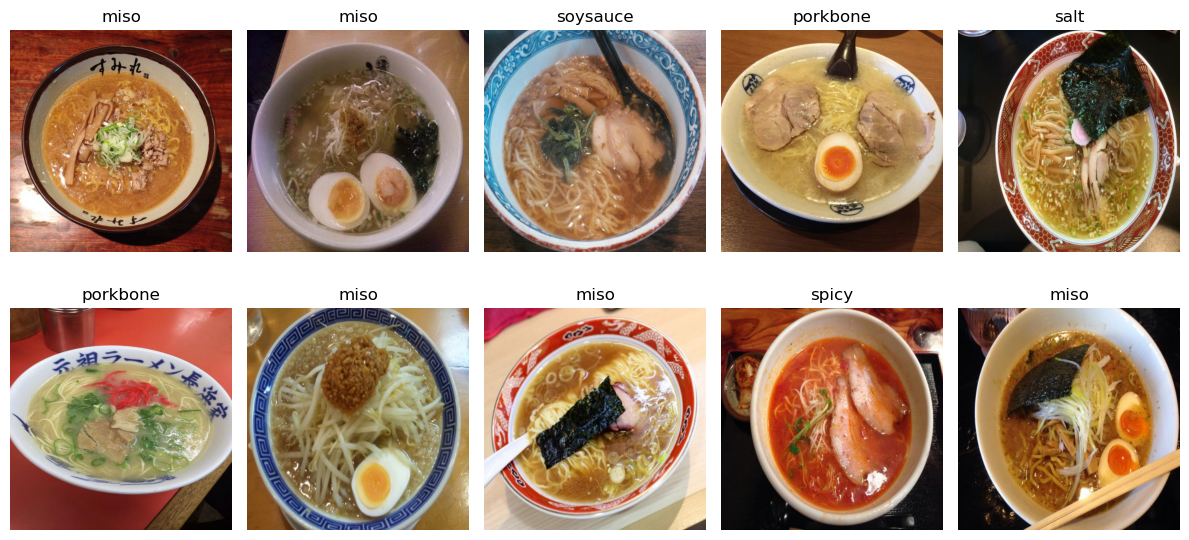

In [54]:
num = 10
random_indices = random.sample(range(ramen_data_size), num)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, random_index in enumerate(random_indices):
  row, col = divmod(i,5)
  ax = axes[row,col]
  filename = normalized_directory + image_files[random_index]
  img = tf.keras.preprocessing.image.load_img(filename)
  label = ramen_data.loc[ramen_data['name'] == image_files[random_index]].drop(columns=['name']).idxmax(axis=1).values[0]
  ax.imshow(img)
  ax.set_title(label)
  ax.axis('off')

plt.tight_layout()
plt.show()

Now, lets split the data into training and testing datasets.

The data will be split into 80% training and 20% testing.

In [56]:
from sklearn.model_selection import train_test_split

#define the features and labels
X = ramen_data["name"]        #features are the image names
Y = ramen_data[ramen_types]  #labels for each category

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
print("There are", len(X_train), " training images.")
print("There are", len(y_test), "test images.")

There are 470  training images.
There are 118 test images.


In [64]:
y_train_counts = y_train.sum()
y_train_counts

salt         53
soysauce     81
miso        114
porkbone    118
spicy        79
tsukemen     25
dtype: int64

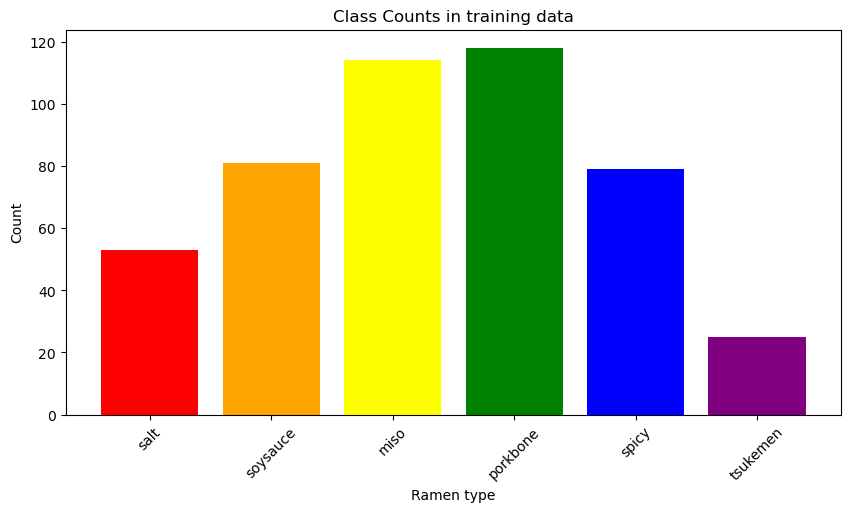

In [69]:
plt.figure(figsize=(10, 5))
plt.bar(ramen_types, y_train_counts, color = colors)
plt.title("Class Counts in training data")
plt.xlabel("Ramen type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [65]:
y_test_counts = y_test.sum()
y_test_counts

salt        14
soysauce    25
miso        23
porkbone    30
spicy       18
tsukemen     8
dtype: int64

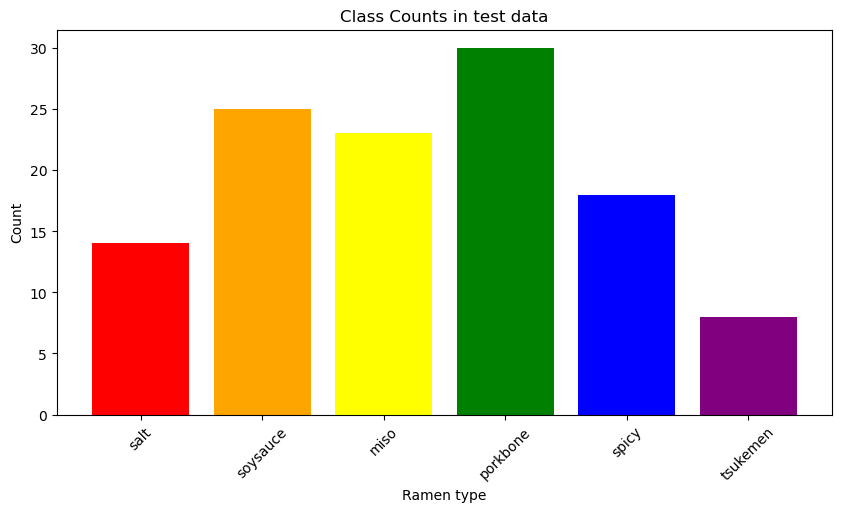

In [70]:
plt.figure(figsize=(10, 5))
plt.bar(ramen_types, y_test_counts, color = colors)
plt.title("Class Counts in test data")
plt.xlabel("Ramen type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Define the Model

  I will be using a neural network model, more specifically a Convolutional Neural Network (CNN)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [72]:
num_categories = len(ramen_types)
num_categories

6

In [124]:
#model object
model = Sequential()
activation = "relu"

#add three to four convolutional layers
model.add(Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding= "same" ,input_shape = (500, 500,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation=activation))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation=activation))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation=activation))
model.add(MaxPooling2D(pool_size=(2,2)))


#flatten data from 2d to 1d 
model.add(Flatten())

#add the fully connected layers
model.add(Dense(128, activation=activation))
model.add(Dropout(0.25))
model.add(Dense(64, activation=activation))
model.add(Dense(num_categories, activation="softmax"))

In [125]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 250, 250, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 248, 248, 32)      4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 conv2d_37 (Conv2D)          (None, 120, 120, 64)     

## Compile and Train the Model

In [126]:
from keras.optimizers import Adam

In [127]:
model.compile(optimizer=Adam(learning_rate= 0.001), 
              loss="categorical_crossentropy",
              metrics= ["accuracy"])

In [128]:
from PIL import Image
import numpy as np

# Load and convert images to NumPy arrays
X_train_img = []
X_test_img = []

for image_path in X_train:
    image_path = normalized_directory + image_path
    img = Image.open(image_path)
    img = img.resize((500, 500))  # Resize to your desired dimensions
    img_array = np.array(img)  # Convert to NumPy array
    X_train_img.append(img_array)

for image_path in X_test:
    image_path = normalized_directory + image_path
    img = Image.open(image_path)
    img = img.resize((500, 500))  # Resize to your desired dimensions
    img_array = np.array(img)  # Convert to NumPy array
    X_test_img.append(img_array)

In [129]:
X_train_img = np.array(X_train_img)
X_test_img = np.array(X_test_img)

In [131]:
history = model.fit(X_train_img, y_train, epochs=30)

Epoch 1/30
15/15 [==============================] - 67s 4s/step - loss: 0.8353 - accuracy: 0.6638
Epoch 2/30
15/15 [==============================] - 66s 4s/step - loss: 0.8866 - accuracy: 0.6170
Epoch 3/30
15/15 [==============================] - 78s 5s/step - loss: 0.7026 - accuracy: 0.7213
Epoch 4/30
15/15 [==============================] - 68s 4s/step - loss: 0.5721 - accuracy: 0.7809
Epoch 5/30
15/15 [==============================] - 68s 5s/step - loss: 0.6116 - accuracy: 0.7532
Epoch 6/30
15/15 [==============================] - 65s 4s/step - loss: 0.5601 - accuracy: 0.7830
Epoch 7/30
15/15 [==============================] - 76s 5s/step - loss: 0.6394 - accuracy: 0.7809
Epoch 8/30
15/15 [==============================] - 65s 4s/step - loss: 0.4274 - accuracy: 0.8362
Epoch 9/30
15/15 [==============================] - 64s 4s/step - loss: 0.3020 - accuracy: 0.8915
Epoch 10/30
15/15 [==============================] - 65s 4s/step - loss: 0.5035 - accuracy: 0.8447
Epoch 11/30
15/15 [

In [132]:
model.save("ramen_model.h5")

# load model
# from keras.models import load_model
# model = load_model('ramen_model.h5')

## Evaluate the Model

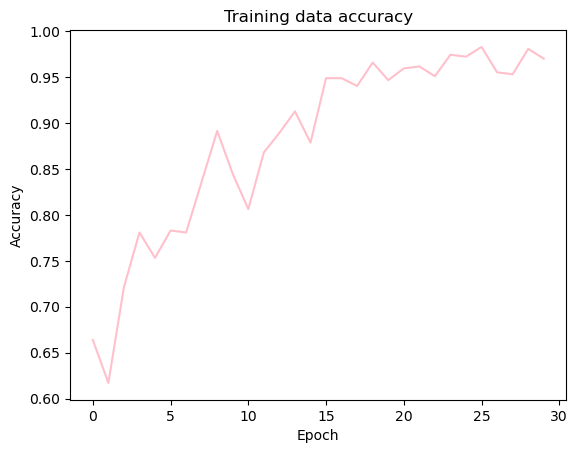

In [136]:
plt.plot(history.history["accuracy"], color = "pink")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training data accuracy')
plt.show()

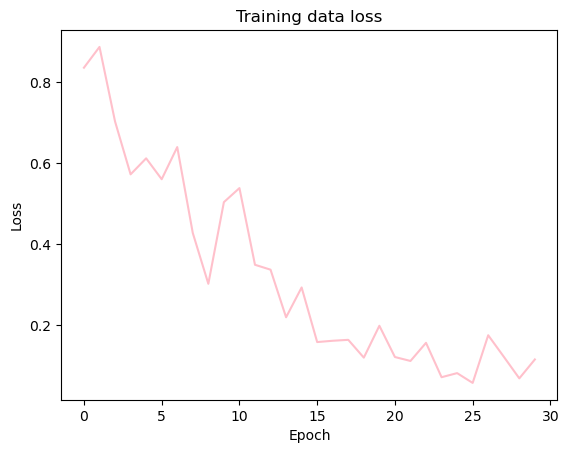

In [137]:
plt.plot(history.history["loss"], color = "pink")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training data loss')
plt.show()

In [279]:
prediction_array = model.predict(X_test_img)
answer = np.argmax(prediction_array, axis = 1)
print(len(answer))
print(answer)

4/4 [==============================] - 6s 1s/step
118
[0 4 2 2 1 3 3 2 3 1 4 1 4 2 1 0 4 2 2 4 0 2 3 5 4 4 1 5 3 4 4 2 3 3 4 2 2
 2 4 2 2 1 2 4 2 4 3 0 1 3 2 2 4 3 4 4 3 2 1 4 2 2 5 3 2 3 1 1 2 0 4 4 0 2
 2 2 1 3 2 2 0 2 5 2 3 1 4 0 3 3 4 3 1 3 4 4 4 2 4 4 3 4 4 4 5 5 3 0 2 4 1
 2 2 1 3 3 0 3]


In [213]:
ramen_type_to_label = {ramen_types[i]: i for i in range(len(ramen_types))}
ramen_type_to_label

{'salt': 0, 'soysauce': 1, 'miso': 2, 'porkbone': 3, 'spicy': 4, 'tsukemen': 5}

In [214]:
y_true = y_test.apply(lambda row: np.argmax(row.to_numpy()), axis=1).to_numpy()

In [259]:
predicted_labels1 = [ramen_types[i] for i in y_true]
print(predicted_labels1)

['porkbone', 'soysauce', 'soysauce', 'porkbone', 'miso', 'miso', 'porkbone', 'soysauce', 'porkbone', 'porkbone', 'spicy', 'salt', 'soysauce', 'miso', 'soysauce', 'miso', 'porkbone', 'soysauce', 'soysauce', 'soysauce', 'porkbone', 'miso', 'porkbone', 'tsukemen', 'soysauce', 'spicy', 'spicy', 'tsukemen', 'miso', 'spicy', 'soysauce', 'salt', 'tsukemen', 'soysauce', 'miso', 'miso', 'porkbone', 'miso', 'salt', 'salt', 'miso', 'salt', 'soysauce', 'porkbone', 'soysauce', 'spicy', 'porkbone', 'porkbone', 'miso', 'miso', 'soysauce', 'salt', 'spicy', 'miso', 'porkbone', 'spicy', 'salt', 'miso', 'porkbone', 'spicy', 'porkbone', 'soysauce', 'tsukemen', 'porkbone', 'porkbone', 'salt', 'porkbone', 'miso', 'tsukemen', 'porkbone', 'spicy', 'spicy', 'soysauce', 'porkbone', 'porkbone', 'soysauce', 'porkbone', 'miso', 'soysauce', 'salt', 'porkbone', 'salt', 'tsukemen', 'salt', 'salt', 'soysauce', 'spicy', 'porkbone', 'porkbone', 'miso', 'spicy', 'soysauce', 'miso', 'miso', 'miso', 'spicy', 'spicy', 'soys

In [ ]:
#predictions by uplaoding images

In [285]:
from sklearn import metrics

In [286]:
print(metrics.classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.10      0.07      0.08        14
           1       0.20      0.12      0.15        25
           2       0.18      0.26      0.21        23
           3       0.33      0.27      0.30        30
           4       0.57      0.94      0.71        18
           5       1.00      0.75      0.86         8

    accuracy                           0.35       118
   macro avg       0.40      0.40      0.38       118
weighted avg       0.33      0.35      0.32       118



The model is performing well on the train data but not test data. This could be a sign of overfitting.

4/4 [==============================] - 5s 1s/step


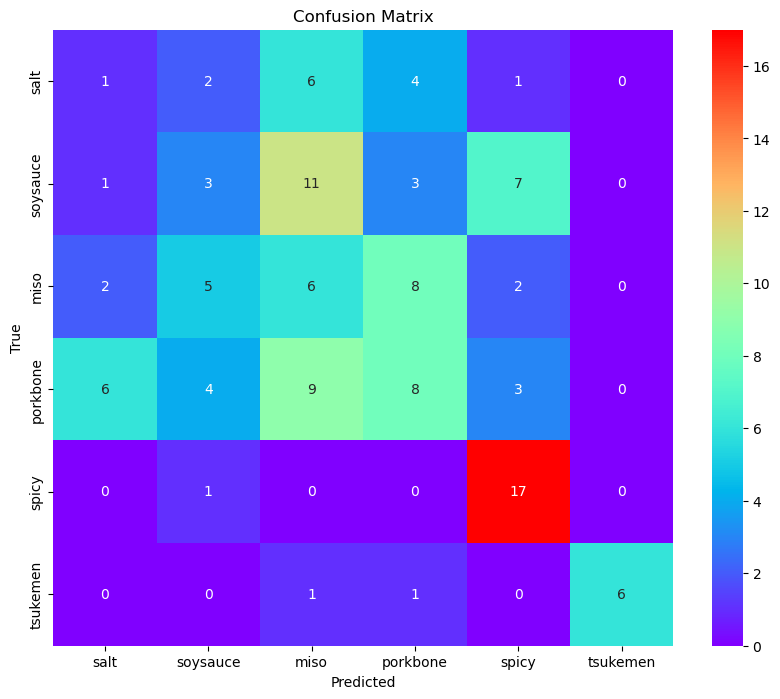

In [327]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

prediction_array = model.predict(X_test_img)
answer = np.argmax(prediction_array, axis = 1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, answer)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rainbow', xticklabels=ramen_types, yticklabels=ramen_types)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Some ways of preventing overfitting:
1. introduce validation data for the model
2. Adding drop out layers
3. Using regularization like L1 or L2

In [288]:
#adding L2 regularization in order to prevent overfitting
#model object
from keras.regularizers import l2
model2 = Sequential()
activation = "relu"

#add three to four convolutional layers
model2.add(Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding= "same" ,input_shape = (500, 500,3), kernel_regularizer=l2(0.01)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=256, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))


#flatten data from 2d to 1d 
model2.add(Flatten())

#add the fully connected layers
model2.add(Dense(128, activation=activation, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.25))
model2.add(Dense(64, activation=activation, kernel_regularizer=l2(0.01)))
model2.add(Dense(num_categories, activation="softmax"))

In [289]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 250, 250, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 248, 248, 32)      4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 124, 124, 32)      0         
                                                                 
 conv2d_44 (Conv2D)          (None, 122, 122, 64)     

In [290]:
model2.compile(optimizer=Adam(learning_rate= 0.001), 
              loss="categorical_crossentropy",
              metrics= ["accuracy"])

In [291]:
model2.fit(X_train_img, y_train, epochs = 20)

Epoch 1/20
15/15 [==============================] - 76s 5s/step - loss: 29.9500 - accuracy: 0.2298
Epoch 2/20
15/15 [==============================] - 65s 4s/step - loss: 9.0803 - accuracy: 0.2426
Epoch 3/20
15/15 [==============================] - 68s 5s/step - loss: 8.9065 - accuracy: 0.2553
Epoch 4/20
15/15 [==============================] - 64s 4s/step - loss: 8.5555 - accuracy: 0.2340
Epoch 5/20
15/15 [==============================] - 65s 4s/step - loss: 8.2763 - accuracy: 0.2426
Epoch 6/20
15/15 [==============================] - 66s 4s/step - loss: 7.9660 - accuracy: 0.2574
Epoch 7/20
15/15 [==============================] - 74s 5s/step - loss: 7.6631 - accuracy: 0.3128
Epoch 8/20
15/15 [==============================] - 64s 4s/step - loss: 7.3098 - accuracy: 0.3745
Epoch 9/20
15/15 [==============================] - 69s 5s/step - loss: 6.9378 - accuracy: 0.4532
Epoch 10/20
15/15 [==============================] - 63s 4s/step - loss: 6.7176 - accuracy: 0.5043
Epoch 11/20
15/15 

In [292]:
prediction_array = model2.predict(X_test_img)
answer = np.argmax(prediction_array, axis = 1)
print(answer)

4/4 [==============================] - 6s 1s/step
[0 2 4 3 0 3 3 1 3 1 4 0 4 2 1 0 2 2 2 4 2 3 3 5 2 4 4 5 1 4 4 2 2 2 4 3 2
 3 4 1 3 3 2 2 1 4 3 0 3 3 2 2 4 5 0 4 2 2 0 4 3 4 5 0 3 3 3 4 5 3 4 4 2 2
 3 2 3 3 2 2 2 2 3 1 3 3 4 3 3 3 4 1 2 2 4 4 4 1 2 4 3 4 4 4 5 5 0 0 3 2 2
 3 3 3 3 3 0 3]


In [293]:
print(metrics.classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.18      0.14      0.16        14
           1       0.56      0.20      0.29        25
           2       0.17      0.22      0.19        23
           3       0.51      0.60      0.55        30
           4       0.63      0.94      0.76        18
           5       0.86      0.75      0.80         8

    accuracy                           0.45       118
   macro avg       0.49      0.48      0.46       118
weighted avg       0.46      0.45      0.43       118



In [297]:
#adding batch normalization and dropout
#model object
from keras.regularizers import l2
from keras.layers import BatchNormalization
model3 = Sequential()
activation = "relu"

#add three to four convolutional layers
model3.add(Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding= "same" ,input_shape = (500, 500,3), kernel_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model3.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=128, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=256, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))


#flatten data from 2d to 1d 
model3.add(Flatten())

#add the fully connected layers
model3.add(Dense(128, activation=activation, kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.25))
model3.add(Dense(64, activation=activation, kernel_regularizer=l2(0.01)))
model3.add(Dense(num_categories, activation="softmax"))

In [298]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 500, 500, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 500, 500, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 250, 250, 16)     0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 250, 250, 16)      0         
                                                                 
 conv2d_49 (Conv2D)          (None, 248, 248, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 248, 248, 32)   

In [299]:
model3.compile(optimizer="Adam", 
              loss="categorical_crossentropy",
              metrics= ["accuracy"])

In [300]:
model3.fit(X_train_img, y_train, epochs = 25)

Epoch 1/25
15/15 [==============================] - 106s 7s/step - loss: 9.7659 - accuracy: 0.2213
Epoch 2/25
15/15 [==============================] - 89s 6s/step - loss: 8.0744 - accuracy: 0.2149
Epoch 3/25
15/15 [==============================] - 92s 6s/step - loss: 7.1361 - accuracy: 0.2745
Epoch 4/25
15/15 [==============================] - 90s 6s/step - loss: 6.2051 - accuracy: 0.3404
Epoch 5/25
15/15 [==============================] - 86s 6s/step - loss: 5.4680 - accuracy: 0.4340
Epoch 6/25
15/15 [==============================] - 91s 6s/step - loss: 4.8743 - accuracy: 0.4553
Epoch 7/25
15/15 [==============================] - 751s 53s/step - loss: 4.4277 - accuracy: 0.4468
Epoch 8/25
15/15 [==============================] - 83s 5s/step - loss: 4.0222 - accuracy: 0.4809
Epoch 9/25
15/15 [==============================] - 80s 5s/step - loss: 3.7721 - accuracy: 0.4596
Epoch 10/25
15/15 [==============================] - 79s 5s/step - loss: 3.4615 - accuracy: 0.5064
Epoch 11/25
15/1

In [301]:
prediction_array = model2.predict(X_test_img)
answer = np.argmax(prediction_array, axis = 1)
print(answer)

4/4 [==============================] - 7s 1s/step
[0 2 1 3 1 3 1 1 3 1 4 0 4 2 1 0 2 2 2 3 2 1 3 5 0 1 1 5 1 4 1 2 2 4 4 1 2
 3 4 1 1 1 2 2 1 4 4 3 0 3 4 2 4 2 3 4 3 2 0 4 3 4 5 3 3 2 1 4 5 2 4 4 1 4
 3 1 2 2 1 0 2 1 5 0 2 3 4 3 1 3 4 1 1 1 4 4 4 1 2 2 3 4 1 4 1 5 0 0 3 2 1
 2 2 3 3 3 0 3]


In [302]:
print(metrics.classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.36      0.29      0.32        14
           1       0.38      0.44      0.41        25
           2       0.16      0.17      0.17        23
           3       0.57      0.43      0.49        30
           4       0.58      0.78      0.67        18
           5       1.00      0.75      0.86         8

    accuracy                           0.44       118
   macro avg       0.51      0.48      0.48       118
weighted avg       0.46      0.44      0.44       118



In [303]:
#adding L2 regularization in order to prevent overfitting
#model object
model2_2 = Sequential()
activation = "relu"

#add three to four convolutional layers
model2_2.add(Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding= "same" ,input_shape = (500, 500,3), 
                    kernel_regularizer=l2(0.01)))
model2_2.add(MaxPooling2D(pool_size=(2,2)))

model2_2.add(Conv2D(filters=32, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Dropout(0.2))

model2_2.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2_2.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Dropout(0.2))

model2_2.add(Conv2D(filters=128, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Conv2D(filters=256, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Dropout(0.2))


#flatten data from 2d to 1d 
model2_2.add(Flatten())

#add the fully connected layers
model2_2.add(Dense(128, activation=activation, kernel_regularizer=l2(0.01)))
model2_2.add(Dropout(0.25))
model2_2.add(Dense(64, activation=activation, kernel_regularizer=l2(0.01)))
model2_2.add(Dense(num_categories, activation="softmax"))

In [304]:
model2_2.compile(optimizer=Adam(learning_rate= 0.001), 
              loss="categorical_crossentropy",
              metrics= ["accuracy"])

In [305]:
model2_2.fit(X_train_img, y_train, epochs = 30, validation_data=(X_test_img, y_test))

Epoch 1/30
15/15 [==============================] - 82s 5s/step - loss: 39.0782 - accuracy: 0.1936 - val_loss: 8.9615 - val_accuracy: 0.2542
Epoch 2/30
15/15 [==============================] - 62s 4s/step - loss: 8.9660 - accuracy: 0.2574 - val_loss: 8.8930 - val_accuracy: 0.2542
Epoch 3/30
15/15 [==============================] - 63s 4s/step - loss: 8.7277 - accuracy: 0.2723 - val_loss: 8.5675 - val_accuracy: 0.3136
Epoch 4/30
15/15 [==============================] - 63s 4s/step - loss: 8.3757 - accuracy: 0.2574 - val_loss: 8.1984 - val_accuracy: 0.3559
Epoch 5/30
15/15 [==============================] - 62s 4s/step - loss: 8.0218 - accuracy: 0.3021 - val_loss: 7.8547 - val_accuracy: 0.4068
Epoch 6/30
15/15 [==============================] - 65s 4s/step - loss: 7.6839 - accuracy: 0.3660 - val_loss: 7.6017 - val_accuracy: 0.3559
Epoch 7/30
15/15 [==============================] - 65s 4s/step - loss: 7.3874 - accuracy: 0.3702 - val_loss: 7.2688 - val_accuracy: 0.3814
Epoch 8/30
15/15 [=

In [308]:
history = _

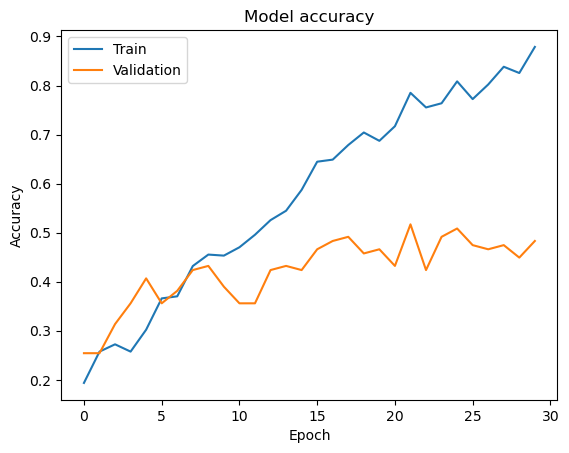

In [309]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

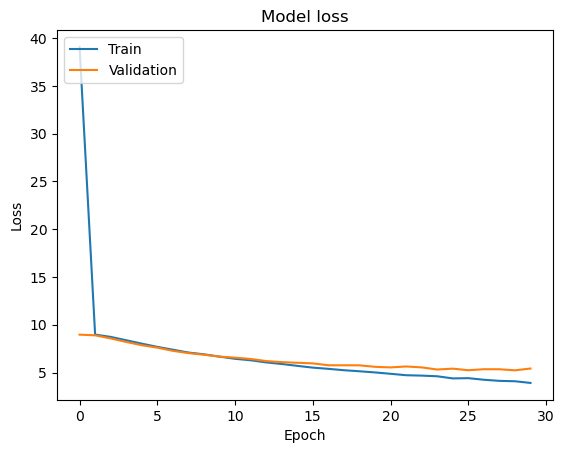

In [310]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

4/4 [==============================] - 5s 1s/step


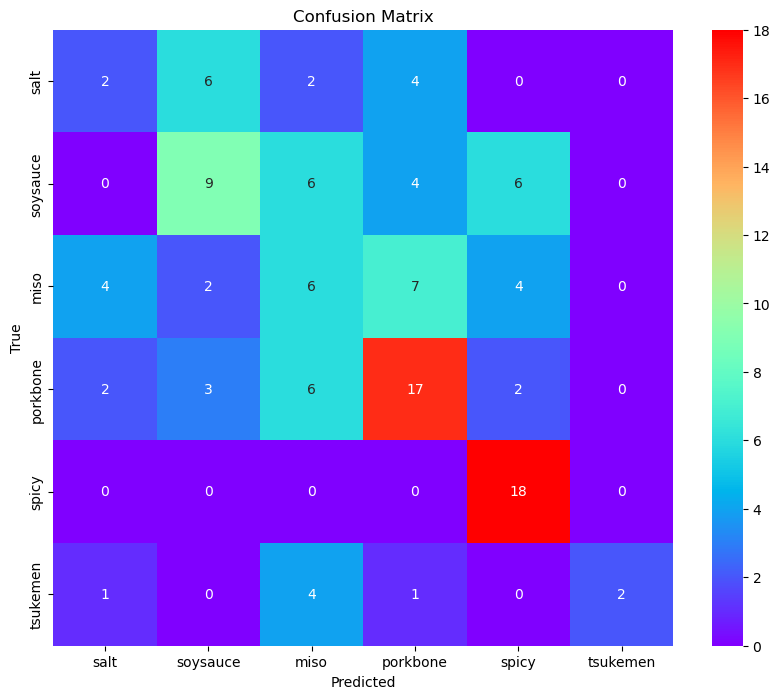

In [315]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

prediction_array = model2_2.predict(X_test_img)
answer = np.argmax(prediction_array, axis = 1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, answer)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rainbow', xticklabels=ramen_types, yticklabels=ramen_types)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [316]:
hisotry = model2_2.fit(X_train_img, y_train, epochs = 15, validation_data=(X_test_img, y_test))

Epoch 1/15
15/15 [==============================] - 90s 6s/step - loss: 3.8848 - accuracy: 0.8617 - val_loss: 5.0988 - val_accuracy: 0.4746
Epoch 2/15
15/15 [==============================] - 88s 6s/step - loss: 3.7727 - accuracy: 0.8617 - val_loss: 5.0520 - val_accuracy: 0.4831
Epoch 3/15
15/15 [==============================] - 81s 5s/step - loss: 3.6858 - accuracy: 0.8766 - val_loss: 5.1330 - val_accuracy: 0.5000
Epoch 4/15
15/15 [==============================] - 78s 5s/step - loss: 3.5888 - accuracy: 0.9043 - val_loss: 5.0740 - val_accuracy: 0.4831
Epoch 5/15
15/15 [==============================] - 66s 4s/step - loss: 3.5961 - accuracy: 0.8872 - val_loss: 4.9341 - val_accuracy: 0.5424
Epoch 6/15
15/15 [==============================] - 82s 6s/step - loss: 3.5197 - accuracy: 0.8809 - val_loss: 4.8187 - val_accuracy: 0.5085
Epoch 7/15
15/15 [==============================] - 92s 6s/step - loss: 3.4044 - accuracy: 0.9213 - val_loss: 5.1868 - val_accuracy: 0.4915
Epoch 8/15
15/15 [==

In [324]:
his = _

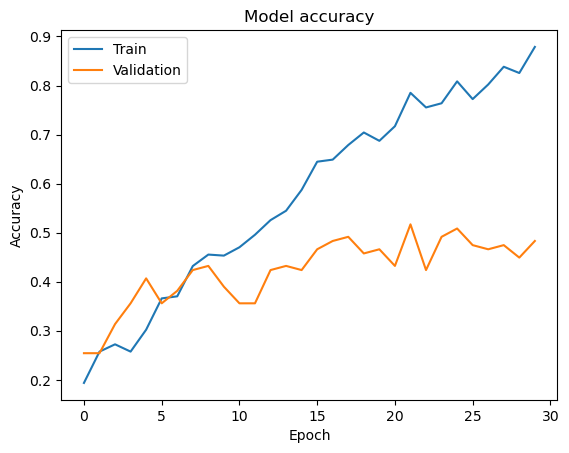

In [325]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

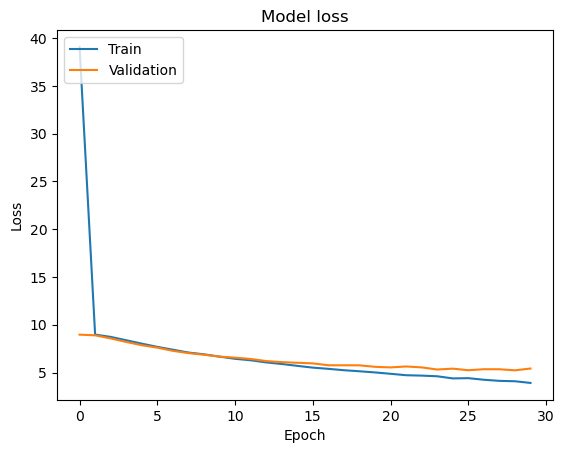

In [323]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

4/4 [==============================] - 6s 1s/step


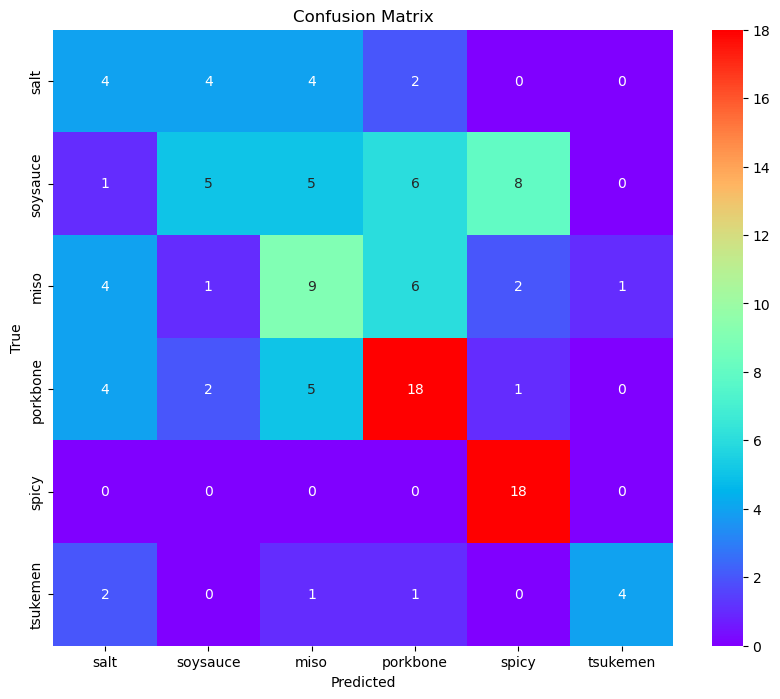

In [326]:
prediction_array = model2_2.predict(X_test_img)
answer = np.argmax(prediction_array, axis = 1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, answer)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rainbow', xticklabels=ramen_types, yticklabels=ramen_types)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [320]:
print(metrics.classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.27      0.29      0.28        14
           1       0.42      0.20      0.27        25
           2       0.38      0.39      0.38        23
           3       0.55      0.60      0.57        30
           4       0.62      1.00      0.77        18
           5       0.80      0.50      0.62         8

    accuracy                           0.49       118
   macro avg       0.50      0.50      0.48       118
weighted avg       0.48      0.49      0.47       118



In [321]:
model2_2.save("ramen2_model.h5")

Trying to train on images of a smaller size

In [329]:
new_normalized_directory = main_directory + "new_normalized/"

In [331]:
new_resize_and_rescale = keras.Sequential([
  layers.Resizing(250, 250),
  layers.Rescaling(rescale_factor)
])

In [332]:
for image_fil in image_files:
  image_path = ramen_directory + image_fil
  img = tf.keras.preprocessing.image.load_img(image_path)
  image_vec = tf.keras.preprocessing.image.img_to_array(img)
  processed_img = new_resize_and_rescale(image_vec)
  processed_img_path = new_normalized_directory + image_fil
  tf.keras.preprocessing.image.save_img(processed_img_path, processed_img)

In [333]:
# split the data into training and testing sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [338]:
print("There are", len(new_X_train), " training images.")
print("There are", len(new_y_test), "test images.")

There are 470  training images.
There are 118 test images.


In [339]:
new_y_test_counts = y_test.sum()
new_y_test_counts

salt        14
soysauce    25
miso        23
porkbone    30
spicy       18
tsukemen     8
dtype: int64

In [340]:
new_X_train_img = []
new_X_test_img = []

for image_path in new_X_train:
    image_path = new_normalized_directory + image_path
    img = Image.open(image_path)
    img = img.resize((250, 250))  # Resize to your desired dimensions
    img_array = np.array(img)  # Convert to NumPy array
    new_X_train_img.append(img_array)

for image_path in new_X_test:
    image_path = new_normalized_directory + image_path
    img = Image.open(image_path)
    img = img.resize((250, 250))  # Resize to your desired dimensions
    img_array = np.array(img)  # Convert to NumPy array
    new_X_test_img.append(img_array)

In [341]:
new_X_train_img = np.array(new_X_train_img)
new_X_test_img = np.array(new_X_test_img)

In [342]:
#adding L2 regularization in order to prevent overfitting
#model object
new_model2_2 = Sequential()
activation = "relu"

#add three to four convolutional layers
new_model2_2.add(Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding= "same" ,input_shape = (250, 250,3), 
                    kernel_regularizer=l2(0.01)))
new_model2_2.add(MaxPooling2D(pool_size=(2,2)))

new_model2_2.add(Conv2D(filters=32, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
new_model2_2.add(MaxPooling2D(pool_size=(2,2)))
new_model2_2.add(Dropout(0.2))

new_model2_2.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
new_model2_2.add(Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
new_model2_2.add(MaxPooling2D(pool_size=(2,2)))
new_model2_2.add(Dropout(0.2))

new_model2_2.add(Conv2D(filters=128, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
new_model2_2.add(MaxPooling2D(pool_size=(2,2)))
new_model2_2.add(Conv2D(filters=256, kernel_size=(3,3), activation=activation, kernel_regularizer=l2(0.01)))
new_model2_2.add(MaxPooling2D(pool_size=(2,2)))
new_model2_2.add(Dropout(0.2))


#flatten data from 2d to 1d 
new_model2_2.add(Flatten())

#add the fully connected layers
new_model2_2.add(Dense(128, activation=activation, kernel_regularizer=l2(0.01)))
new_model2_2.add(Dropout(0.25))
new_model2_2.add(Dense(64, activation=activation, kernel_regularizer=l2(0.01)))
new_model2_2.add(Dense(num_categories, activation="softmax"))

In [343]:
new_model2_2.compile(optimizer=Adam(learning_rate= 0.001), 
              loss="categorical_crossentropy",
              metrics= ["accuracy"])

In [344]:
new_history = new_model2_2.fit(new_X_train_img, new_y_train, epochs = 50, validation_data=(new_X_test_img, new_y_test))

Epoch 1/50
15/15 [==============================] - 17s 1s/step - loss: 13.3338 - accuracy: 0.1936 - val_loss: 8.1688 - val_accuracy: 0.1949
Epoch 2/50
15/15 [==============================] - 15s 972ms/step - loss: 7.9260 - accuracy: 0.2340 - val_loss: 7.7055 - val_accuracy: 0.1864
Epoch 3/50
15/15 [==============================] - 14s 952ms/step - loss: 7.5029 - accuracy: 0.2511 - val_loss: 7.3376 - val_accuracy: 0.2627
Epoch 4/50
15/15 [==============================] - 15s 967ms/step - loss: 7.1562 - accuracy: 0.2638 - val_loss: 7.0158 - val_accuracy: 0.2542
Epoch 5/50
15/15 [==============================] - 14s 958ms/step - loss: 6.8519 - accuracy: 0.2489 - val_loss: 6.7039 - val_accuracy: 0.2881
Epoch 6/50
15/15 [==============================] - 15s 966ms/step - loss: 6.5683 - accuracy: 0.2340 - val_loss: 6.4468 - val_accuracy: 0.2542
Epoch 7/50
15/15 [==============================] - 15s 983ms/step - loss: 6.3058 - accuracy: 0.2638 - val_loss: 6.1838 - val_accuracy: 0.2542
E

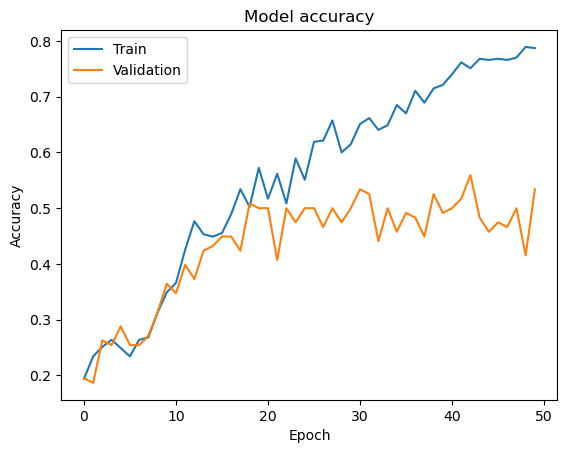

In [345]:
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [346]:
new_history2 = new_model2_2.fit(new_X_train_img, new_y_train, epochs = 20, validation_data=(new_X_test_img, new_y_test))

Epoch 1/20
15/15 [==============================] - 17s 1s/step - loss: 1.9901 - accuracy: 0.8064 - val_loss: 3.3337 - val_accuracy: 0.4746
Epoch 2/20
15/15 [==============================] - 18s 1s/step - loss: 1.9948 - accuracy: 0.8064 - val_loss: 3.1837 - val_accuracy: 0.4407
Epoch 3/20
15/15 [==============================] - 17s 1s/step - loss: 1.8866 - accuracy: 0.8149 - val_loss: 3.2162 - val_accuracy: 0.5000
Epoch 4/20
15/15 [==============================] - 14s 942ms/step - loss: 1.8754 - accuracy: 0.8149 - val_loss: 3.2652 - val_accuracy: 0.4407
Epoch 5/20
15/15 [==============================] - 14s 949ms/step - loss: 1.8788 - accuracy: 0.8085 - val_loss: 3.0503 - val_accuracy: 0.4746
Epoch 6/20
15/15 [==============================] - 14s 940ms/step - loss: 1.7565 - accuracy: 0.8574 - val_loss: 3.3426 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 14s 949ms/step - loss: 1.6885 - accuracy: 0.8319 - val_loss: 3.4858 - val_accuracy: 0.4492
Epoch 8/

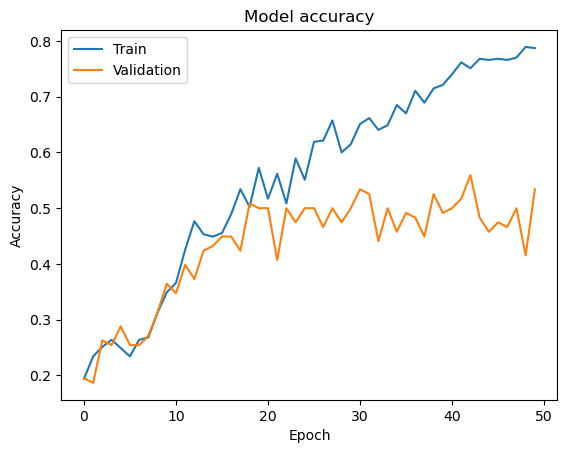

In [347]:
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

4/4 [==============================] - 1s 294ms/step


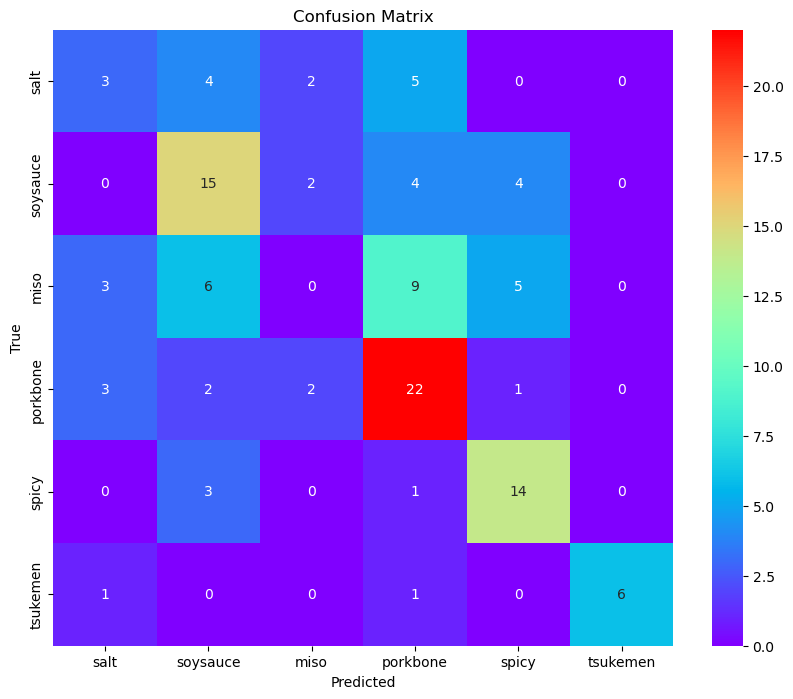

In [350]:
prediction_array = new_model2_2.predict(new_X_test_img)
new_answer = np.argmax(prediction_array, axis = 1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, new_answer)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rainbow', xticklabels=ramen_types, yticklabels=ramen_types)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [351]:
print(metrics.classification_report(y_true, new_answer))

              precision    recall  f1-score   support

           0       0.30      0.21      0.25        14
           1       0.50      0.60      0.55        25
           2       0.00      0.00      0.00        23
           3       0.52      0.73      0.61        30
           4       0.58      0.78      0.67        18
           5       1.00      0.75      0.86         8

    accuracy                           0.51       118
   macro avg       0.48      0.51      0.49       118
weighted avg       0.43      0.51      0.46       118



Predicting my own data

In [ ]:
def predict(image_path):
    #resize and reshape image to fit into model
    image_path = ramen_directory + "my_images/" + image_path
    img = Image.open(image_path)
    img = img.resize((250, 250))  # Resize to your desired dimensions
    img_array = np.array(img)  # Convert to NumPy array
    answer = new_model2_2.predict(img_array)

    return ramen_types[answer]
    